Training on 2622 rows (excluding noise)

Test Accuracy: 0.5143

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        96
           1       0.48      0.60      0.53       109
           2       0.48      0.48      0.48       104
           3       0.52      0.53      0.52       106
           4       0.52      0.51      0.52       110

    accuracy                           0.51       525
   macro avg       0.52      0.51      0.51       525
weighted avg       0.52      0.51      0.51       525



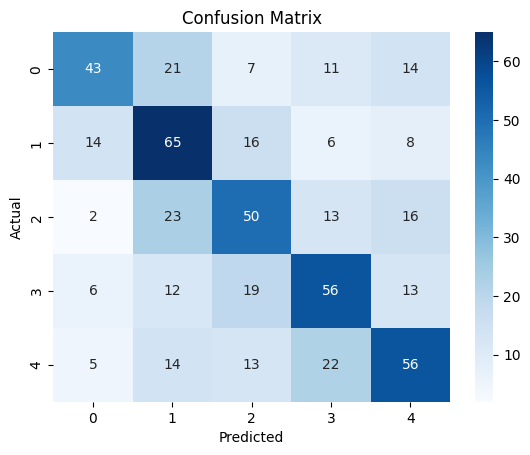

In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("./progress_added.csv")

# parse embedding (from string) to actual list
df["embedding"] = df["embedding"].apply(ast.literal_eval)

# filter out noise
df = df[df["cluster"] != -1]

print(f"Training on {len(df)} rows (excluding noise)")

# prepare X (features) and y (labels)
embeddings = np.vstack(df["embedding"].values)

# Option 1: embeddings only
# X = embeddings

# Option 2: embeddings + cluster as extra feature
cluster_feature = df["cluster"].values.reshape(-1, 1)
X = np.hstack([embeddings, cluster_feature])

y = df["progress_label"].values

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train classifier
# clf = XGBClassifier(
#     objective="multi:softmax",  # classification
#     num_class=5,                # 5 classes
#     eval_metric="mlogloss",
#     use_label_encoder=False,
#     n_jobs=-1
# )
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
